In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

In [2]:
# pip install mplfinance

In [3]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    # Reads data into a dataframe
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv(
        "/mount/Project/Project Files/Data/Finance Data/Stock/" +
        # "/Users/derekbanas/Documents/Tutorials/Python for Finance/" + 
        ticker + '.csv')
    return df

In [4]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv(
            "/mount/Project/Project Files/Data/Finance Data/Stock/" +
            # "/Users/derekbanas/Documents/Tutorials/Python for Finance/" + 
            ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

In [5]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv(
        "/mount/Project/Project Files/Data/Finance Data/Stock/" +
        # "/Users/derekbanas/Documents/Tutorials/Python for Finance/" + 
        ticker + '.csv')
    return df  

In [6]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

In [7]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        df = pd.read_csv(
            "/mount/Project/Project Files/Data/Finance Data/Stock/" +
            # '/Users/derekbanas/Documents/Tutorials/Python for Finance/' + 
            ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

In [8]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv(
            "/mount/Project/Project Files/Data/Finance Data/Stock/" +
            # "/Users/derekbanas/Documents/Tutorials/Python for Finance/" + 
            ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

In [9]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [10]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
        
    return mult_df

In [11]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

In [12]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [13]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

In [14]:
# Call to read the data from Yahoo into a CSV and then retrieve a Dataframe
# AMZN = save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)

In [15]:
# Retrieve data from the CSV file
AMZN = get_df_from_csv('AAPL')

In [16]:
AMZN

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443
1,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083
2,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770
3,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930
4,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081
...,...,...,...,...,...,...,...
248,2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829
249,2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766
250,2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273
251,2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650


In [17]:
# Add daily return to function
add_daily_return_to_df(AMZN, 'AMZN')

AMZN

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,NaN
1,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,-0.009722
2,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,0.007968
3,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.004703
4,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,0.016086
...,...,...,...,...,...,...,...,...
248,2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829,0.007712
249,2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766,0.035766
250,2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273,-0.013315
251,2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650,-0.008527


In [18]:
AMZN['Adj Close']

0       74.096443
1       73.376083
2       73.960770
3       73.612930
4       74.797081
          ...    
248    131.352829
249    136.050766
250    134.239273
251    133.094650
252    132.069473
Name: Adj Close, Length: 253, dtype: float64

In [19]:
AMZN['Adj Close'].shift(1)

0             NaN
1       74.096443
2       73.376083
3       73.960770
4       73.612930
          ...    
248    130.347565
249    131.352829
250    136.050766
251    134.239273
252    133.094650
Name: Adj Close, Length: 253, dtype: float64

In [20]:
# Get total return between dates
tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

Total Return : 0.690061740198122


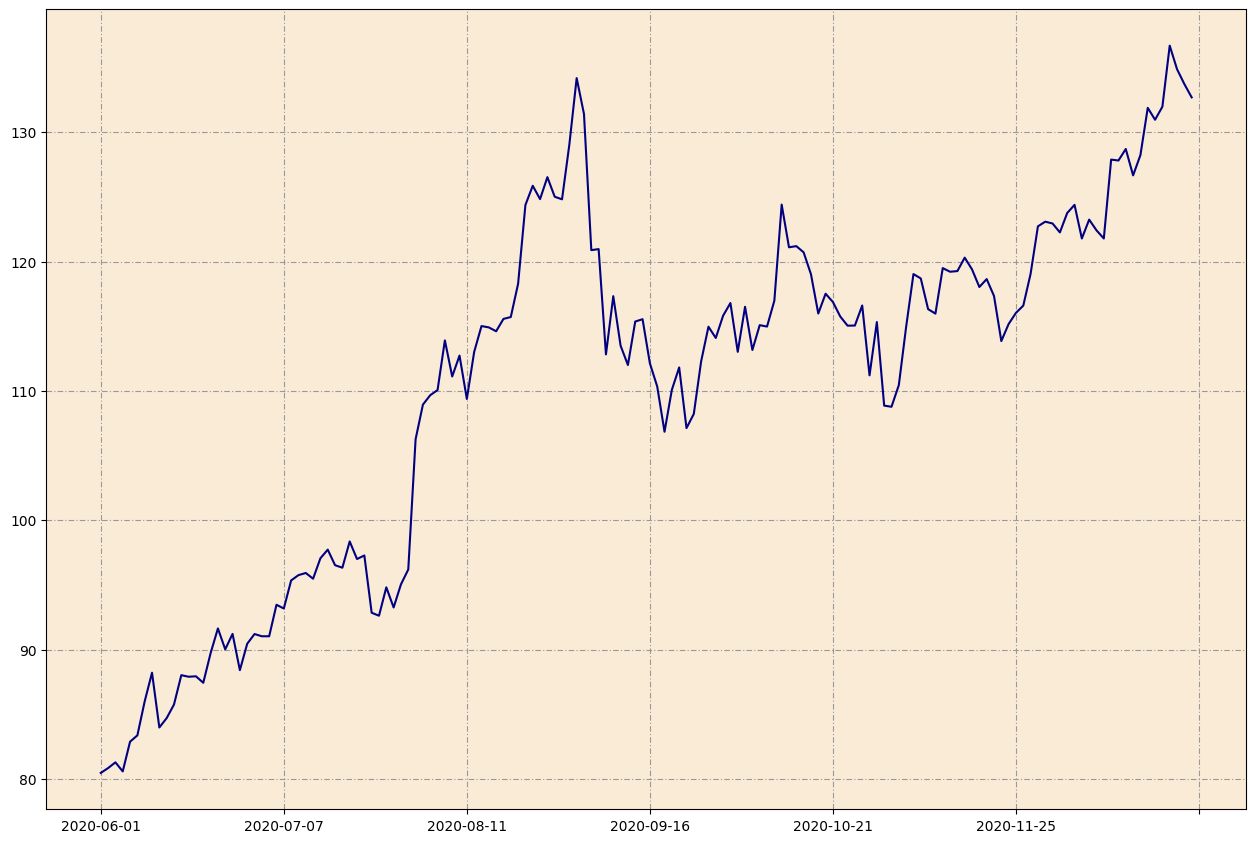

In [21]:
# Use Matplotlib finance to print multiple charts
# mplfinance_plot('AMZN', 'ohlc', 2020, 6, 1, 2021, 1, 1)

price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

In [22]:
# def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
#     # Will hold data for all dataframes with the same column name
#     mult_df = pd.DataFrame()
    
#     start = f"{syear}-{smonth}-{sday}"
#     end = f"{eyear}-{emonth}-{eday}"
    
#     for x in tickers:
#         mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
        
#     return mult_df

In [28]:
# Download multiple stocks
tickers = ["FB", "AAPL", "NFLX", "GOOG"]
# download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)


def merge_df_by_column_name_from_csv(col_name, csv_files):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()

    for csv_file in csv_files:
        df = pd.read_csv(
            "/mount/Project/Project Files/Data/Finance Data/Stock/" + csv_file + '.csv')
        if col_name in df.columns:
            mult_df[csv_file] = df[col_name]

    return mult_df

# Merge dataframes from multiple stocks using the same column name
tickers = [
     "AMZN", "AAPL", ]
mult_df = merge_df_by_column_name_from_csv('Adj Close', tickers)
mult_df.tail()

,AMZN,AAPL
248,131.352829,131.352829
249,136.050766,136.050766
250,134.239273,134.239273
251,133.094650,133.094650
252,132.069473,132.069473


In [29]:
def combine_csv_data(tickers, column_name):
    # Create an empty DataFrame to store the combined data
    combined_df = pd.DataFrame()

    # Iterate through the tickers
    for ticker in tickers:
        try:
            # Read the CSV file for the current ticker into a DataFrame
            # filename = f"{ticker}_data.csv"  # Assuming file names are like 'AB_data.csv', 'PK_data.csv'
            filename= "/mount/Project/Project Files/Data/Finance Data/Stock/" + ticker + '.csv'
            df = pd.read_csv(filename)
            
            date_column = 'Date'
            # Rename the column to include the ticker symbol
            # df = df.rename(columns={column_name: f"{ticker} {column_name}"})
            for col in df.columns:
                if col != date_column:
                    new_col_name = f"{ticker} {col}"
                    df = df.rename(columns={col: new_col_name})
                    
            # Merge the current DataFrame with the combined DataFrame
            if combined_df.empty:
                combined_df = df
            else:
                combined_df = pd.merge(combined_df, df, on='Date', how='outer'
                                      )
        except FileNotFoundError:
            print(f"File {filename} not found for ticker {ticker}.")

    return combined_df

# Example usage:
tickers = [
    "AMZN", "AAPL", ]
column_name = 'Adj Close'
result_df = combine_csv_data(tickers, column_name)

result_df
# Now, result_df contains the combined data with columns 'AB Closing Price' and 'PK Closing Price'

,AMZN Unnamed: 0,Date,AMZN High,AMZN Low,AMZN Open,AMZN Close,AMZN Volume,AMZN Adj Close,AMZN daily_return,AAPL High,AAPL Low,AAPL Open,AAPL Close,AAPL Volume,AAPL Adj Close
0,0,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,NaN,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443
1,1,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,-0.009722,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083
2,2,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,0.007968,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770
3,3,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.004703,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930
4,4,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,0.016086,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829,0.007712,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829
249,249,2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766,0.035766,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766
250,250,2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273,-0.013315,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273
251,251,2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650,-0.008527,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650


In [27]:
filename= "/mount/Project/Project Files/Data/Finance Data/Stock/" + tickers[1] + '.csv'
df = pd.read_csv(filename)
df.columns

Index(['Unnamed: 0', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Adj Close', 'daily_return'],
      dtype='object')

In [31]:
# Pass Investment Amount and Plot Returns using Multiple Stocks
plot_return_mult_stocks(100, result_df)

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [32]:
result_df

,AMZN Unnamed: 0,Date,AMZN High,AMZN Low,AMZN Open,AMZN Close,AMZN Volume,AMZN Adj Close,AMZN daily_return,AAPL High,AAPL Low,AAPL Open,AAPL Close,AAPL Volume,AAPL Adj Close
0,0,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,NaN,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443
1,1,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,-0.009722,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083
2,2,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,0.007968,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770
3,3,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.004703,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930
4,4,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,0.016086,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248,2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829,0.007712,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829
249,249,2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766,0.035766,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766
250,250,2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273,-0.013315,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273
251,251,2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650,-0.008527,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650


In [ ]:
# Pass Investment Amount and Plot Returns using Multiple Stocks
plot_return_mult_stocks(100, mult_df)

In [ ]:
mult_df